# Stacking moorings

Features developed:
1. Multiple instrument types per mooring
1. Multiple variables per mooring
1. Stack timeseries

Issues:
1. I had z_nom, lat_nom, lon_nom as attributes before. I now get that should have been actual nc coordinates. 

In [1]:
import pIMOS.xrwrap.pl2_stacked_mooring as sm

import os
import xarray as xr
import matplotlib.pyplot as plt
import datetime
import numpy as np 
import pandas as pd
import glob

import pIMOS.utils.quality_control as pqc
import importlib
import zutils.time as ztime

from zutils.xrwrap import xrwrap

project_root = r'G:\Experiments\kissme17'
project_root = r'E:\Experiments\kissme17'

archive_FV01 = os.path.join(project_root, 'archive_FV01') 
archive_FV02 = os.path.join(project_root, 'archive_FV02') 
dbconfig_file = os.path.join(project_root, 'database', 'config.txt') 

if not os.path.exists(archive_FV01):
    os.mkdir(archive_FV01)
    
if not os.path.exists(archive_FV02):
    os.mkdir(archive_FV02)
    
import pIMOS.utils.UWA_archive_utils as ai


<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


<class 'datetime.datetime'>
Module tested
<class 'datetime.datetime'>
Time vector is well spaced
<class 'numpy.datetime64'>
Time vector is well spaced
There are 101 elements in this 10 second period spaced at 0.1.
Time Module OK
[[ 6.123234e-17 -1.000000e+00  0.000000e+00]
 [ 1.000000e+00  6.123234e-17  0.000000e+00]
 [ 0.000000e+00  0.000000e+00  1.000000e+00]]


c:\users\azulberti\dropbox\university\phd\03_code\source_code\turbo_tools\turbo_tools\utils\time.py:182: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  ans = linspacetime(pd.datetime.today(), pd.datetime.today()+datetime.timedelta(1), n=100)
c:\users\azulberti\dropbox\university\phd\03_code\source_code\turbo_tools\turbo_tools\utils\time.py:189: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  ans = linspacetime(pd.datetime.today(), pd.datetime.today()+dt, dt_s=dt_s)


In [4]:
from collections import OrderedDict

def get_files(mooring, instruments):
    files = []
    for instrument in instruments:
        instr_dir = os.path.join(archive_FV01, instrument) 
        files += glob.glob(instr_dir+'/*KISSME2017*KISSME_REC*[[]{}[]]*.nc'.format(mooring))
    
    if len(files) == 0:
        raise(Exception("No files found"))
        
    return files


In [8]:
sbds = ['SBE56', 'SBE39', 'SBE37']

start = datetime.datetime(2017, 3, 31)
end = datetime.datetime(2017, 5, 1)

mooring = 'SP250-Lander'
files = get_files(mooring, sbds)
rr_scalar_sp250_L = sm.from_fv01_archive(files, 
                     ['Temperature', 'Pressure'], 
                     start=start, 
                     end=end,
                     z_method='z_nom')

mooring = 'SP250'
files = get_files(mooring, sbds)
rr_scalar_sp250 = sm.from_fv01_archive(files, 
                     ['Temperature', 'Pressure'], 
                     start=start, 
                     end=end,
                     z_method='z_nom')

mooring = 'NP250'
files = get_files(mooring, sbds)
rr_scalar_np250 = sm.from_fv01_archive(files, 
                     ['Temperature', 'Conductivity', 'Pressure'], 
                     start=start, 
                     end=end,
                     z_method='z_nom')

mooring = 'WP250'
files = get_files(mooring, sbds)
rr_scalar_wp250 = sm.from_fv01_archive(files, 
                     ['Temperature', 'Pressure'], 
                     start=start, 
                     end=end,
                     z_method='z_nom')


Loading file 0 of 31
Wrapped an existing xarray dataset. Class attributes taken from the dataset. Dataset attrs cleared.
    File starts 2017-04-01T01:00:00.000000000
Blanking 57609 values.
Loading file 1 of 31
Wrapped an existing xarray dataset. Class attributes taken from the dataset. Dataset attrs cleared.
    File starts 2017-04-01T01:00:00.000000000
Blanking 433699 values.
Loading file 2 of 31
Wrapped an existing xarray dataset. Class attributes taken from the dataset. Dataset attrs cleared.
    File starts 2017-04-01T01:00:00.000000000
Blanking 57656 values.
Loading file 3 of 31
Wrapped an existing xarray dataset. Class attributes taken from the dataset. Dataset attrs cleared.
    File starts 2017-04-01T01:00:00.000000000
Blanking 57602 values.
Loading file 4 of 31
Wrapped an existing xarray dataset. Class attributes taken from the dataset. Dataset attrs cleared.
    File starts 2017-04-01T01:00:00.000000000
Blanking 57602 values.
Loading file 5 of 31
Wrapped an existing xarray d

Wrapped an existing xarray dataset. Class attributes taken from the dataset. Dataset attrs cleared.
    File starts 2017-04-01T01:00:00.000000000
Blanking 230402 values.
Loading file 13 of 26
Wrapped an existing xarray dataset. Class attributes taken from the dataset. Dataset attrs cleared.
    File starts 2017-04-01T01:00:00.000000000
Blanking 230402 values.
Loading file 14 of 26
Wrapped an existing xarray dataset. Class attributes taken from the dataset. Dataset attrs cleared.
    File starts 2017-04-01T01:00:00.000000000
Blanking 600295 values.
Loading file 15 of 26
Wrapped an existing xarray dataset. Class attributes taken from the dataset. Dataset attrs cleared.
    File starts 2017-04-01T01:00:00.000000000
Blanking 230402 values.
Loading file 16 of 26
Wrapped an existing xarray dataset. Class attributes taken from the dataset. Dataset attrs cleared.
    File starts 2017-04-01T01:00:00.000000000
Blanking 230402 values.
Loading file 17 of 26
Wrapped an existing xarray dataset. Clas

## Load Signature pressure for knockdown correction 

Opened multtfile dataset
   Title is "Measured data from a Nortek Signature"
   Source is "Nortek Signature ADCP"
Measured data from a Seabird Data Logger
Measured data from a RSI VMP read from .P file
Measured data from a profiling Seabird CTD
Measured data from a TDRI ADCP
Measured data from a WetLABS data logger
Measured data from a LISST Data Logger
Measured data from a Nortek Vector
Measured data from a Nortek Signature
Dataset appears to be a <class 'pIMOS.xrwrap.nortek_signature.NORTEK_SIGNATURE'>
Initialising accessor.
STORING RAW FILE ATTRIBUTES


c:\users\azulberti\dropbox\university\phd\03_code\source_code\pimos\pIMOS\api.py:62: UserWarning: Source should be pIMOS. Setting tp pIMOS and warning for now, will become an error in future.
  warnings.warn('Source should be pIMOS. Setting tp pIMOS and warning for now, will become an error in future.')


Blanking 921600 values.


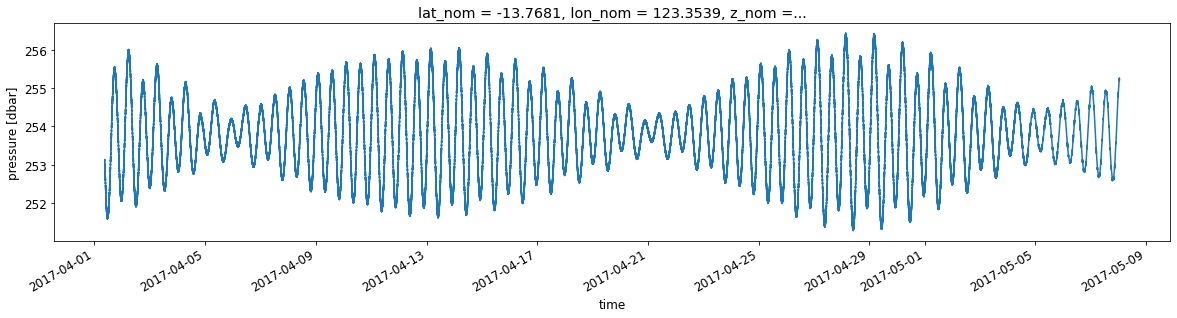

In [6]:
import glob, xarray as xr, warnings, matplotlib.pyplot as plt

from pIMOS.api import load_pimos_nc
sig_files = glob.glob(r'E:\Experiments\kissme17\Archive_FV01\Signature 1000\*.nc')

rr_mf = load_pimos_nc(sig_files)

plt.figure(figsize=(20, 4))
rr_mf.get_qaqc_var('pressure').plot()


Blanking 921600 values.


<ipython-input-12-e8d4cd078bb8>:10: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  plt.pcolor(ds.time[tind], z, ds.Temperature[:, tind], cmap='Spectral_r', shading='auto')


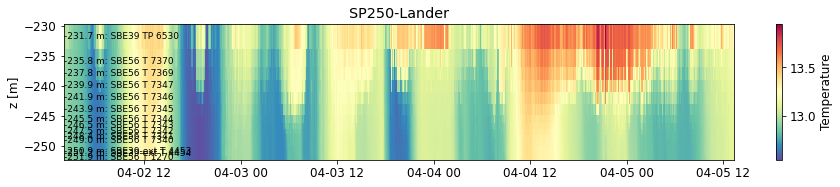

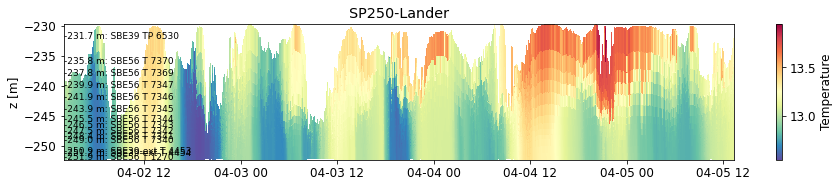

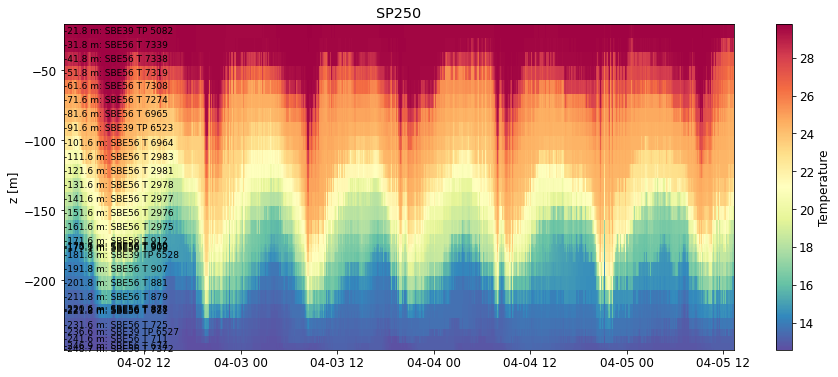

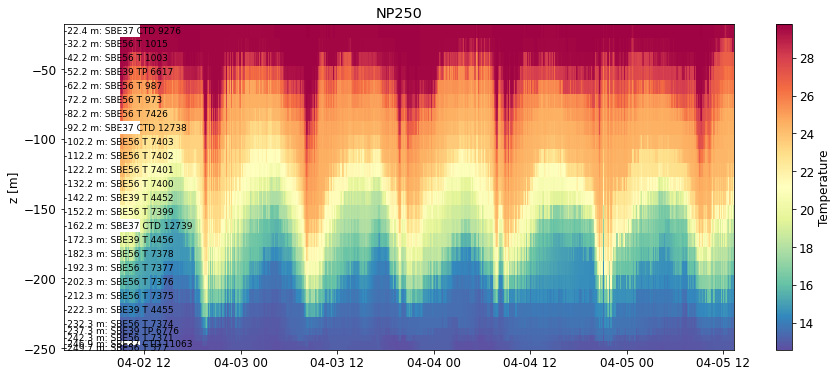

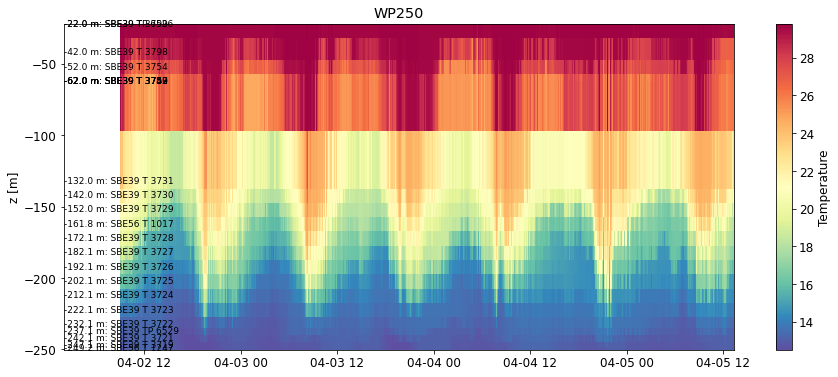

In [12]:
tind = np.arange(3000, 8000)

def scalar_plotter(ds, fh=6, kd_correct=False):
    plt.figure(figsize=(15, fh))
    
    z = ds.z_nom
    if kd_correct:
        z = ds.z_hat[:, tind]
        
    plt.pcolor(ds.time[tind], z, ds.Temperature[:, tind], cmap='Spectral_r', shading='auto')
    plt.colorbar(label='Temperature')
    plt.ylabel('z [m]')
    plt.title(ds.attrs['site_station'])
    [plt.text(ds.time.values[tind][0], 
              ds.z_nom.values[n], 
              '{:.1f} m: {}'.format(ds.z_nom.values[n], ds.source.values[n]), 
              va = 'center',
              fontsize=9) for n in range(len(ds.source.values))]

# Only correctling SP-250 Lander
    # Just use HASB is 0.0
rr_scalar_sp250_L.knockdown_correct(rr_mf.ds.time.values, rr_mf.get_qaqc_var('pressure').values, 0.0)

scalar_plotter(rr_scalar_sp250_L.ds, fh=2.5)
scalar_plotter(rr_scalar_sp250_L.ds, fh=2.5, kd_correct=True)
scalar_plotter(rr_scalar_sp250.ds)
scalar_plotter(rr_scalar_np250.ds)
scalar_plotter(rr_scalar_wp250.ds)


(20.0, 60.0)

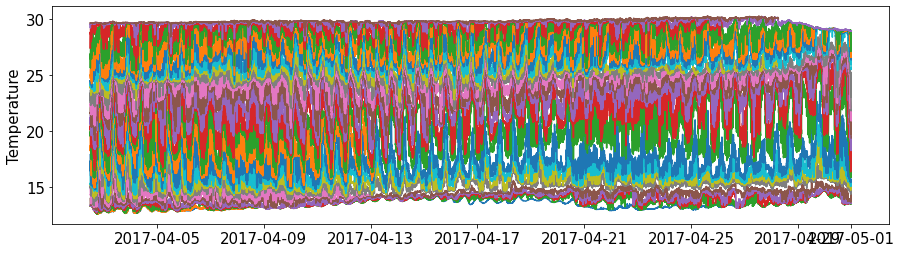

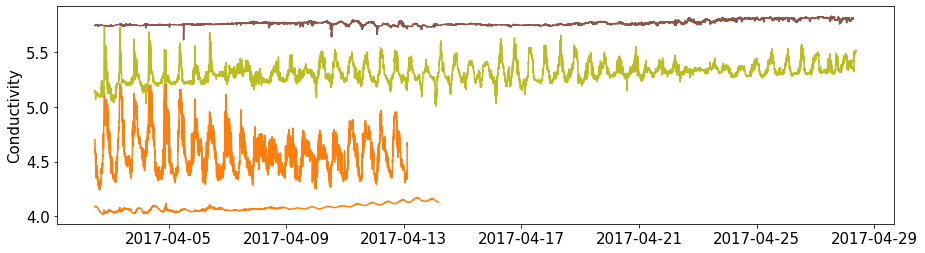

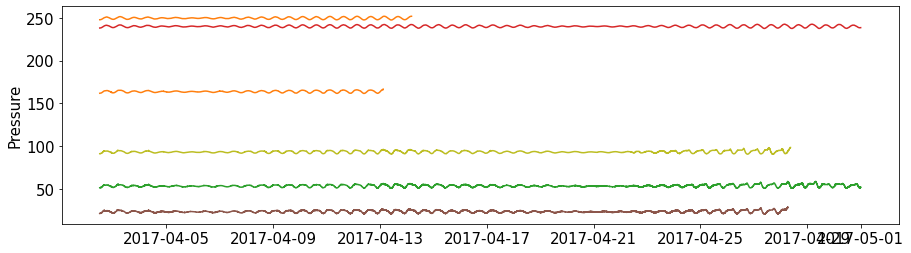

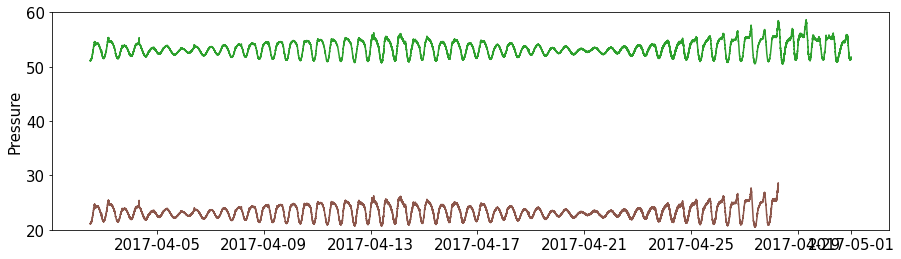

In [5]:
s = 3600

plt.figure(figsize=(15, 4))
plt.plot(rr_scalar_np250.ds.time[s::], rr_scalar_np250.ds.Temperature[:, s::].T)
plt.ylabel('Temperature')

plt.figure(figsize=(15, 4))
plt.plot(rr_scalar_np250.ds.time[s::], rr_scalar_np250.ds.Conductivity[:, s::].T)
plt.ylabel('Conductivity')

plt.figure(figsize=(15, 4))
plt.plot(rr_scalar_np250.ds.time[s::], rr_scalar_np250.ds.Pressure[:, s::].T)
plt.ylabel('Pressure')

plt.figure(figsize=(15, 4))
plt.plot(rr_scalar_np250.ds.time[s::], rr_scalar_np250.ds.Pressure[:, s::].T)
plt.ylabel('Pressure')
plt.ylim([20, 60])

# ^^ Some strange stuff in those pressure plots at the end there

In [6]:

mooring = 'NP250'
start = datetime.datetime(2017, 3, 31)
end = datetime.datetime(2017, 5, 1)
adcps = ['RDI 300 kHz Monitor', 
         'RDI 150 kHz Quartermaster', 
         'RDI 300 kHz Sentinel',
         'RDI75 kHz Longranger'
        ]

files = get_files(mooring, adcps)
rr_vel_np250 = sm.from_fv01_archive(files, 
                     ['u'], 
                     start=start, 
                     end=end,
                     z_method='prof_z_nom')

mooring = 'WP250'
files = get_files(mooring, adcps)
rr_vel_wp250 = sm.from_fv01_archive(files, 
                     ['u'], 
                     start=start, 
                     end=end,
                     z_method='prof_z_nom')

mooring = 'SP250'
files = get_files(mooring, adcps)
rr_vel_sp250 = sm.from_fv01_archive(files, 
                     ['u'], 
                     start=start, 
                     end=end,
                     z_method='prof_z_nom')

# adcps = ['Signature 1000']

# mooring = 'SP250-Lander'
# ds_vel_sp250_L, ds = sm.from_fv01_archhive(files, 
#                      ['u'], 
#                      adcps, 
#                      start=start, 
#                      end=end,
#                      z_method='prof_z_nom')


Loading file 0 of 2
Wrapped an existing xarray dataset. Class attributes taken from the dataset. Dataset attrs cleared.
    File starts 2017-03-31T23:00:00.000003000
Blanking 112011 values.
Loading file 1 of 2
Wrapped an existing xarray dataset. Class attributes taken from the dataset. Dataset attrs cleared.
    File starts 2017-03-31T23:00:00.000003000
Blanking 119824 values.
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Loading file 0 of 2
Wrapped an existing xarray dataset. Class attributes taken from the dataset. Dataset attrs cleared.
    File starts 2017-03-31T23:00:00.000003000
Blanking 129253 values.
Loading file 1 of 2
Wrapped an existing xarray dataset. Class attributes taken from the dataset. Dataset attrs cleared.
    File starts 2017-03-31T23:00:00.000003000
Blanking 42866 values.
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Loading file 0 of 1
Wrapped an existing xarray dataset. Class attributes taken from the dataset. Dataset attrs cleared.
    File starts 201

In [7]:
def ADCP_plotter(ds, sk=10):
    
    plt.figure(figsize=(15, 4))
    plt.pcolor(ds.time[tind].values, ds.prof_z_nom, ds.u[:, tind], cmap='RdBu_r', vmin=-0.8, vmax=0.8, shading='auto')
    plt.colorbar(label='u [m/s]')
    plt.ylabel('z [m]')
    plt.title(ds.attrs['site_station'])
    [plt.text(ds.time.values[tind][0], 
              ds.prof_z_nom.values[n], 
              '{:.1f} m: {}'.format(ds.prof_z_nom.values[n], ds.source.values[n]), 
              va = 'center',
              fontsize=9) for n in np.arange(0, len(ds.source.values), sk)]
    

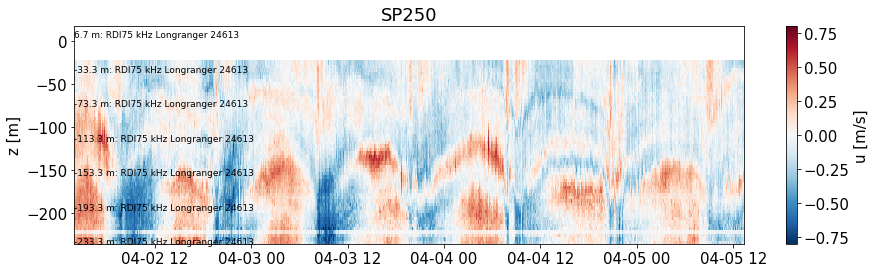

In [8]:
ADCP_plotter(rr_vel_sp250.ds, sk=10)

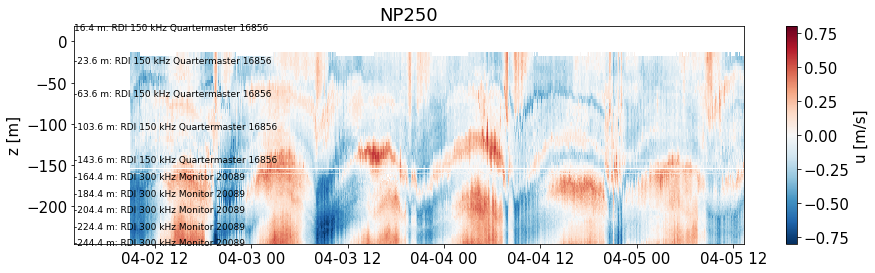

In [9]:
ADCP_plotter(rr_vel_np250.ds, sk=10)

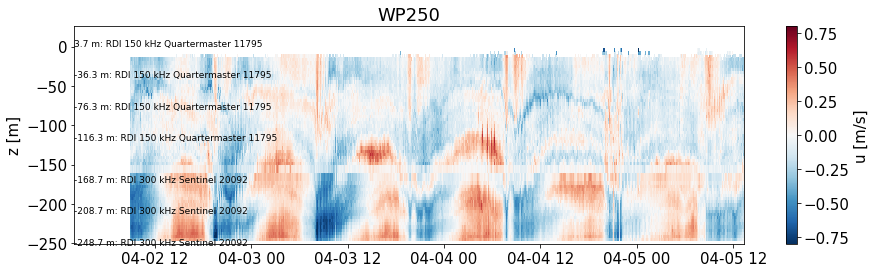

In [10]:
ADCP_plotter(rr_vel_wp250.ds, sk=10)

# Export Step

In [11]:
for rr in [rr_scalar_sp250_L, rr_scalar_sp250, rr_scalar_np250, rr_scalar_wp250]:
    
#     rr.ds.attrs['instrument_model'] = 'many'
#     rr.ds.attrs['instrument_serial_number'] = 'many'
    
    ai.pIMOS_export(rr, archive_FV02, 'stacked_moorings_tp')
    
    
for rr in [rr_vel_sp250, rr_vel_np250, rr_vel_wp250]:
    
#     rr.ds.attrs['instrument_model'] = 'many'
#     rr.ds.attrs['instrument_serial_number'] = 'many'
    
    ai.pIMOS_export(rr, archive_FV02, 'stacked_moorings_adcp')
    

E:\Experiments\kissme17\archive_FV02\stacked_moorings_tp
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\kissme17\archive_FV02\stacked_moorings_tp//[KISSME2017]_[KISSME_REC]_[SP250-Lander]_[multi(14)_nominal_instrument_height_asb]_[multi(3)_instrument_model]_[multi(14)_instrument_serial_number]_[no_outfile_append].nc
E:\Experiments\kissme17\archive_FV02\stacked_moorings_tp
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\kissme17\archive_FV02\stacked_moorings_tp//[KISSME2017]_[KISSME_REC]_[SP250]_[multi(31)_nominal_instrument_height_asb]_[multi(2)_instrument_model]_[multi(31)_instrument_serial_number]_[no_outfile_append].nc
E:\Experiments\kissme17\archive_FV02\stacked_moorings_tp
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporti

# Add knockdown correction

Opened multtfile dataset
   Title is "Measured data from a Nortek Signature"
   Source is "Nortek Signature ADCP"
Measured data from a Seabird Data Logger
Measured data from a RSI VMP read from .P file
Measured data from a profiling Seabird CTD
Measured data from a TDRI ADCP
Measured data from a WetLABS data logger
Measured data from a LISST Data Logger
Measured data from a Nortek Vector
Measured data from a Nortek Signature
Dataset appears to be a <class 'pIMOS.xrwrap.nortek_signature.NORTEK_SIGNATURE'>
Initialising accessor.
STORING RAW FILE ATTRIBUTES


c:\users\azulberti\dropbox\university\phd\03_code\source_code\pimos\pIMOS\api.py:62: UserWarning: Source should be pIMOS. Setting tp pIMOS and warning for now, will become an error in future.
  warnings.warn('Source should be pIMOS. Setting tp pIMOS and warning for now, will become an error in future.')


Blanking 921600 values.


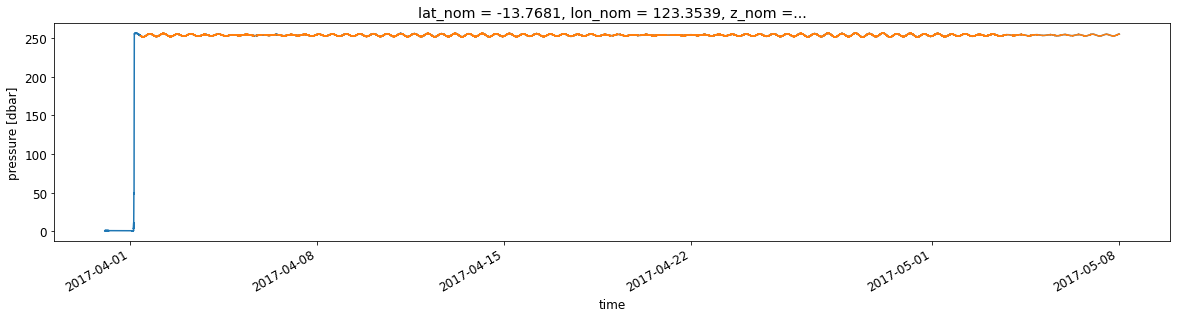

Blanking 921600 values.


<ipython-input-139-b948f82dc875>:4: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  plt.pcolor(ds.time[tind], ds.z_hat[:, tind], ds.Temperature[:, tind], cmap='Spectral_r', shading='auto')


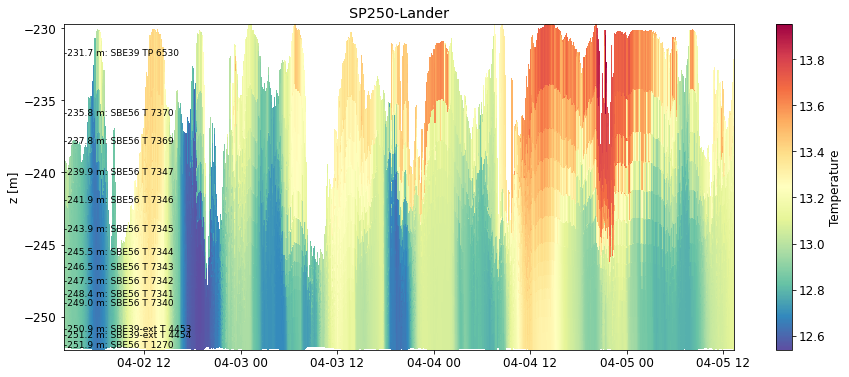

In [139]:

scalar_plotter(rr_scalar_sp250_L.ds)

In [111]:
rr_scalar_sp250_L.ds

<xarray.Dataset>
Dimensions:      (time: 44640, z_nom: 14)
Coordinates:
  * z_nom        (z_nom) float64 -251.9 -251.2 -250.9 ... -237.8 -235.8 -231.7
  * time         (time) datetime64[ns] 2017-03-31 ... 2017-04-30T23:59:00
    lat_nom      <U1 ''
    lon_nom      <U1 ''
Data variables:
    Temperature  (z_nom, time) float64 nan nan nan nan ... 13.73 13.75 13.76
    Pressure     (z_nom, time) float64 nan nan nan nan ... 235.3 235.2 235.3
    source       (z_nom) <U16 'SBE56 T 1270' ... 'SBE39 TP 6530'
    z_hat        object {'z_hat': (['z_nom', 'time'], array([[           nan,...
Attributes: (12/34)
    title:                           Mooring made by stacking multipe files
    institution:                     The University of Western Australia
    institution_division:            Ocean Dynamics
    source:                          E:\Experiments\kissme17\archive_FV01\SBE...
    project:                         KISSME2017
    history:                         
    ...                              ...
    pressure_sensor_height_asb:      
    nominal_instrument_height_asb:   10.06;12.06;14.16;16.16;2.96;3.56;4.46;5...
    nominal_instrument_orientation:  
    timezone:                        UTC
    process_level:                   Process Level 0
    is_profile_data:                 0